### 1.Parsing

In [2]:
import pandas as pd
import numpy as np
import datetime

#### (1)

In [9]:
pd.Timedelta("1 days")

Timedelta('1 days 00:00:00')

In [10]:
pd.Timedelta("1 days 00:00:00")

Timedelta('1 days 00:00:00')

In [5]:
pd.Timedelta("1 days 2 hours")

Timedelta('1 days 02:00:00')

In [6]:
pd.Timedelta("-1 days 2 min 3us")

Timedelta('-2 days +23:57:59.999997')

#### (2) keyword arguments

In [7]:
pd.Timedelta(days = 1, seconds = 1)

Timedelta('1 days 00:00:01')

#### (3)

In [11]:
pd.Timedelta(1, unit = "d")

Timedelta('1 days 00:00:00')

#### (4) datetime.timedelta() / np.timedelta64()

In [13]:
pd.Timedelta(datetime.timedelta(days = 1, seconds = 1))

Timedelta('1 days 00:00:01')

In [14]:
pd.Timedelta(np.timedelta64(1, "ms"))

Timedelta('0 days 00:00:00.001000')

#### (5)

In [15]:
pd.Timedelta("-1us")

Timedelta('-1 days +23:59:59.999999')

#### (6)

In [16]:
pd.Timedelta("nan")

NaT

In [17]:
pd.Timedelta("nat")

NaT

#### (7)

In [18]:
pd.Timedelta("P0DT0H1M0S")

Timedelta('0 days 00:01:00')

In [20]:
pd.Timedelta("P0DT0H0M0.000000123S")

Timedelta('0 days 00:00:00.000000')

#### (8)

In [21]:
pd.Timedelta(pd.offsets.Second(2))

Timedelta('0 days 00:00:02')

#### (9)

In [22]:
pd.Timedelta(pd.offsets.Day(2)) + \
pd.Timedelta(pd.offsets.Second(2)) + \
pd.Timedelta("00:00:00.000123")

Timedelta('2 days 00:00:02.000123')

#### (10) to_timedelta

In [23]:
pd.to_timedelta("1 days 06:05:01.00003")

Timedelta('1 days 06:05:01.000030')

In [24]:
pd.to_timedelta("15.5us")

Timedelta('0 days 00:00:00.000015')

In [25]:
pd.to_timedelta([
    "1 days 06:05:01.00003",
    "15.5us",
    "nan"
])

TimedeltaIndex(['1 days 06:05:01.000030', '0 days 00:00:00.000015', NaT], dtype='timedelta64[ns]', freq=None)

In [26]:
pd.to_timedelta(np.arange(5), unit = "s")

TimedeltaIndex(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04'], dtype='timedelta64[ns]', freq=None)

In [27]:
pd.to_timedelta(np.arange(5), unit = "d")

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

#### (11) Timedelta limitations

In [28]:
pd.Timedelta.min

Timedelta('-106752 days +00:12:43.145224')

In [29]:
pd.Timedelta.max

Timedelta('106751 days 23:47:16.854775')

### 2.Operations

In [30]:
s = pd.Series(pd.date_range("2012-1-1", periods = 3, freq = "D"))

In [54]:
import numpy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

# 原数据
x = np.linspace(0, 10, num = 11, endpoint = True)
y = np.cos(-x ** 2 / 9.0)

# interpolation
f1 = interp1d(x, y, kind = "linear")
f2 = interp1d(x, y, kind = "cubic")
f3 = interp1d(x, y, kind = "nearest")
f4 = interp1d(x, y, kind = "previous")
f5 = interp1d(x, y, kind = "next")

xnew = np.linspace(0, 10, num = 10004, endpoint = True)

ynew1 = f1(xnew)
ynew2 = f2(xnew)
ynew3 = f3(xnew)
ynew4 = f4(xnew)
ynew5 = f5(xnew)

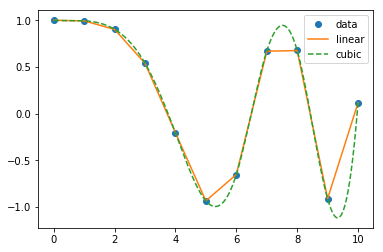

In [53]:
plt.plot(x, y, "o", xnew, ynew1, "-", xnew, ynew2, "--")
plt.legend(["data", "linear", "cubic"], loc = "best")
plt.show()

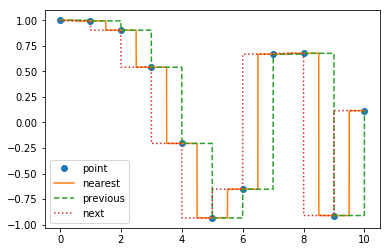

In [55]:
plt.plot(x, y, "o", xnew, ynew3, "-", xnew, ynew4, "--", xnew, ynew5, ":")
plt.legend(["point", "nearest", "previous", "next"], loc = "best")
plt.show()